In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import sklearn
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings('ignore')
import scipy
import re
%matplotlib inline

In [2]:
df1 = pd.read_csv('spam.csv',encoding='ISO-8859-1')
df1

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df1.shape

(5572, 5)

In [4]:
df=df1.iloc[:,0:2]
df.rename(columns={'v1':'category','v2':'mails'},inplace=True)
df

,category,mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [5]:
df.shape

(5572, 2)

In [6]:
df.isnull().sum()

category    0
mails       0
dtype: int64

In [7]:
df['category'].value_counts()

ham     4825
spam     747
Name: category, dtype: int64

<AxesSubplot:xlabel='category', ylabel='count'>

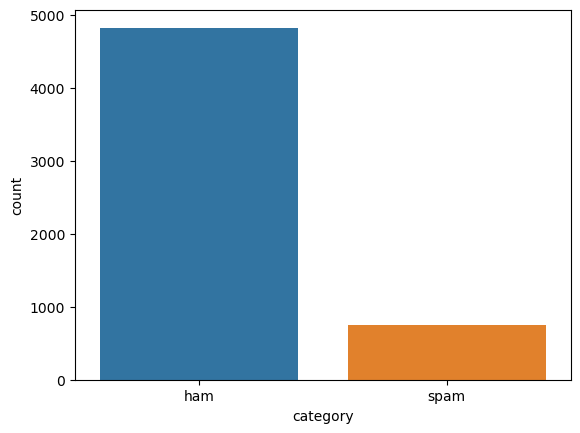

In [8]:
sns.countplot(x=df['category'])

#### Removing HTML Tags :

In [9]:
def remove_html(text):
  bs=BeautifulSoup(text,'html.parser')
  return bs.get_text()
df['mails']=df['mails'].apply(lambda text:remove_html(text))  
df

,category,mails
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [10]:
# Define a custom list of stopwords
custom_stopwords = set([
    'your', 'custom', 'stop', 'words', 'here'
])

# Function to remove stopwords
def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in custom_stopwords]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to your DataFrame
df['mails'] = df['mails'].apply(remove_stopwords)

In [11]:
#Removing Punctuation Marks :
from string import punctuation
punc=punctuation
my_punc=punc.replace("'",'')
def remove_punc(text):
  return text.translate(str.maketrans('','',my_punc))
df['mails']=df['mails'].apply(lambda text:remove_punc(text))  
df


,category,mails
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I don't think he goes to usf he lives arou...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì b going to esplanade fr home
5569,ham,Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like i'd...


In [12]:
# Removing Special Characters :
def remove_spec(text):
  text=re.sub('http\s+\s',' ',text)
  text=re.sub('#\s+',' ',text)
  text=re.sub('@\s+',' ',text)
  text=re.sub(r'[^\x00-\x7f]', ' ',text)
  text=re.sub('\s+',' ',text)
  return text
df['mails']=df['mails'].apply(lambda x:remove_spec(x))  
df

,category,mails
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I don't think he goes to usf he lives arou...
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will b going to esplanade fr home
5569,ham,Pity was in mood for that Soany other suggestions
5570,ham,The guy did some bitching but I acted like i'd...


In [13]:
# Stemming Process :
df2=df.copy()

In [14]:
from nltk.stem import PorterStemmer
ps=PorterStemmer()
df2['mails']=df2['mails'].apply(lambda x:' '.join(ps.stem(word)for word in x.split()))
df2

,category,mails
0,ham,go until jurong point crazi avail onli in bugi...
1,ham,ok lar joke wif u oni
2,spam,free entri in 2 a wkli comp to win fa cup fina...
3,ham,u dun say so earli hor u c alreadi then say
4,ham,nah i don't think he goe to usf he live around...
...,...,...
5567,spam,thi is the 2nd time we have tri 2 contact u u ...
5568,ham,will b go to esplanad fr home
5569,ham,piti wa in mood for that soani other suggest
5570,ham,the guy did some bitch but i act like i'd be i...


In [15]:
# Most Frequent Words(Spam Mails) :
from collections import Counter
coun=Counter()
spam_df=df[df['category']=='spam']
ham_df=df[df['category']=='ham']
for text in spam_df['mails'].values:
  for word in text.split():
    coun[word]+=1
f=coun.most_common(150)    
print(f)

[('to', 608), ('a', 358), ('call', 189), ('you', 185), ('or', 185), ('the', 178), ('2', 173), ('for', 171), ('is', 149), ('on', 138), ('Call', 137), ('now', 131), ('have', 128), ('and', 119), ('4', 119), ('FREE', 113), ('from', 112), ('ur', 107), ('with', 102), ('mobile', 95), ('of', 95), ('U', 86), ('claim', 78), ('You', 77), ('are', 77), ('our', 76), ('prize', 73), ('To', 73), ('text', 72), ('txt', 70), ('Txt', 70), ('in', 68), ('free', 62), ('u', 62), ('only', 58), ('reply', 58), ('contact', 56), ('be', 50), ('16', 49), ('won', 49), ('service', 49), ('week', 48), ('who', 48), ('send', 47), ('out', 47), ('just', 47), ('per', 46), ('this', 46), ('Nokia', 46), ('get', 45), ('500', 45), ('NOW', 44), ('been', 43), ('cash', 43), ('18', 43), ('Free', 42), ('Reply', 42), ('new', 42), ('150', 41), ('URGENT', 41), ('1000', 41), ('Text', 40), ('will', 40), ('This', 40), ('customer', 39), ('I', 39), ('No', 38), ('100', 37), ('awarded', 37), ('2000', 37), ('1', 36), ('We', 36), ('Please', 35), (

In [16]:
# Most Frequent Words(Ham Mails) :
coun1=Counter()
for text1 in ham_df['mails'].values:
  for word1 in text.split():
    coun1[word1]+=1
f1=coun1.most_common(150)    
print(f1)

[('is', 9650), ('the', 9650), ('have', 9650), ('2', 9650), ('This', 4825), ('2nd', 4825), ('time', 4825), ('we', 4825), ('tried', 4825), ('contact', 4825), ('u', 4825), ('U', 4825), ('won', 4825), ('750', 4825), ('Pound', 4825), ('prize', 4825), ('claim', 4825), ('easy', 4825), ('call', 4825), ('087187272008', 4825), ('NOW1', 4825), ('Only', 4825), ('10p', 4825), ('per', 4825), ('minute', 4825), ('BTnationalrate', 4825)]


In [17]:
# Word Cloud :
from wordcloud import WordCloud
spam_wc=' '.join([words for words in spam_df['mails']])
ham_wc=' '.join([word_ham for word_ham in ham_df['mails']])
wc=WordCloud(width=1200,height=700,max_words=150)
wc1=WordCloud(width=1200,height=700,max_words=150)
word1=wc.generate(spam_wc)
word2=wc1.generate(ham_wc)

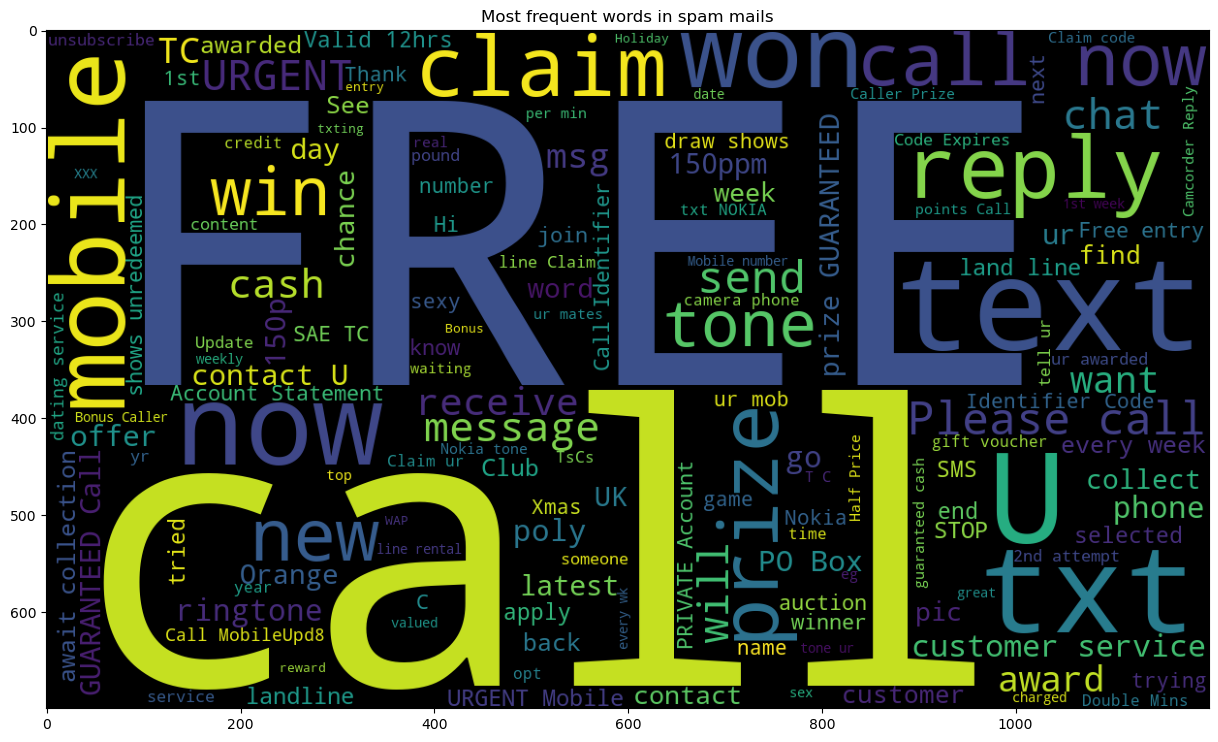

In [18]:
# Word Cloud Of Spam Mails :
plt.figure(figsize=(15,10))
plt.imshow(word1,cmap='Accent_r')
plt.title('Most frequent words in spam mails')
plt.show()

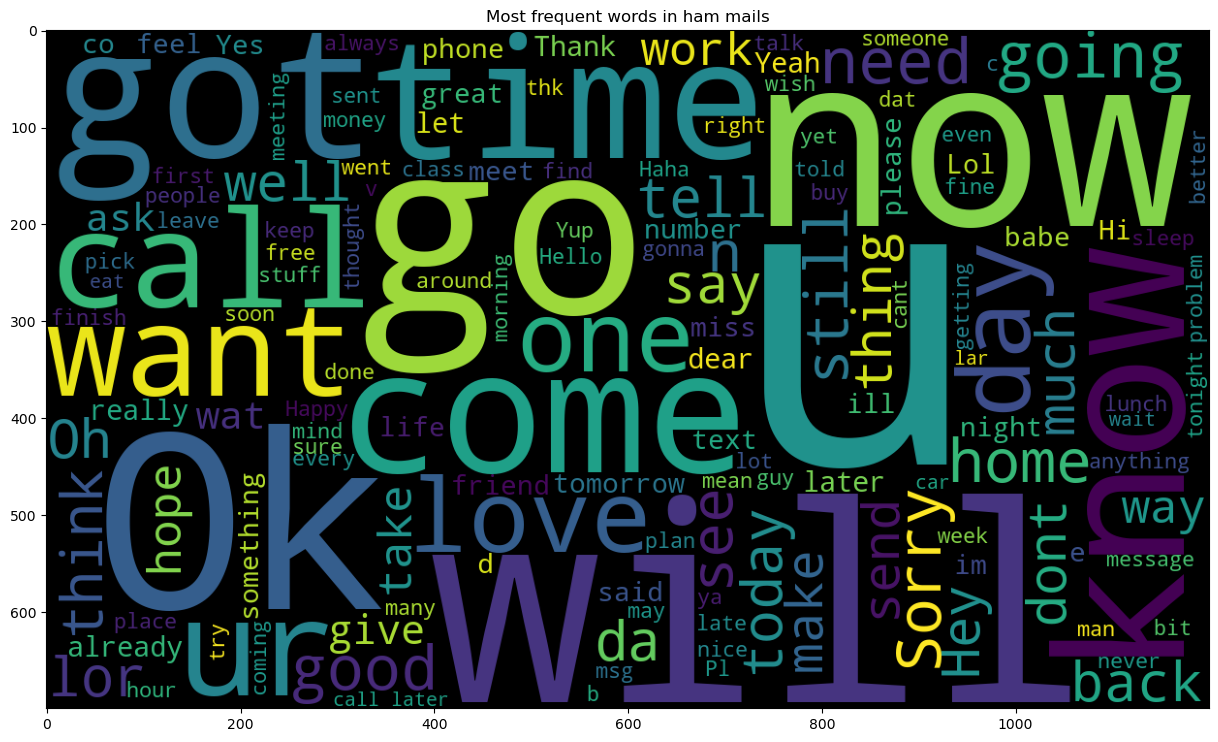

In [19]:
# Word Cloud Of Ham Mails :
plt.figure(figsize=(15,10))
plt.imshow(word2)
plt.title('Most frequent words in ham mails')
plt.show()

In [20]:
# Word Cloud After Stemming :
stem_spam_df=df2[df2['category']=='spam']
stem_ham_df=df2[df2['category']=='ham']
stem_spam=' '.join([word2 for word2 in stem_spam_df['mails']])
stem_ham=' '.join([word3 for word3 in stem_ham_df['mails']])
wc2=WordCloud(width=1200,height=700,max_words=150)
wc3=WordCloud(width=1200,height=700,max_words=150)
stem_spam1=wc2.generate(stem_spam)
stem_ham1=wc3.generate(stem_ham)

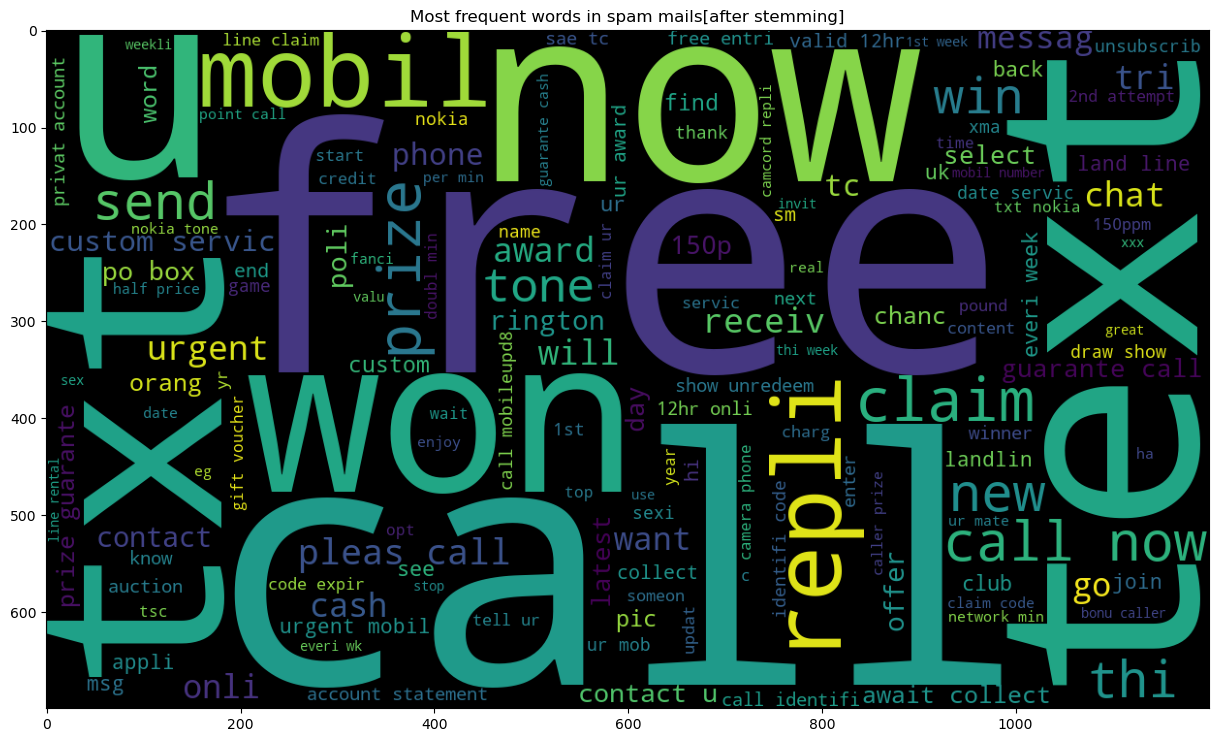

In [21]:
plt.figure(figsize=(15,10))
plt.imshow(stem_spam1,cmap='Accent_r')
plt.title('Most frequent words in spam mails[after stemming]')
plt.show()

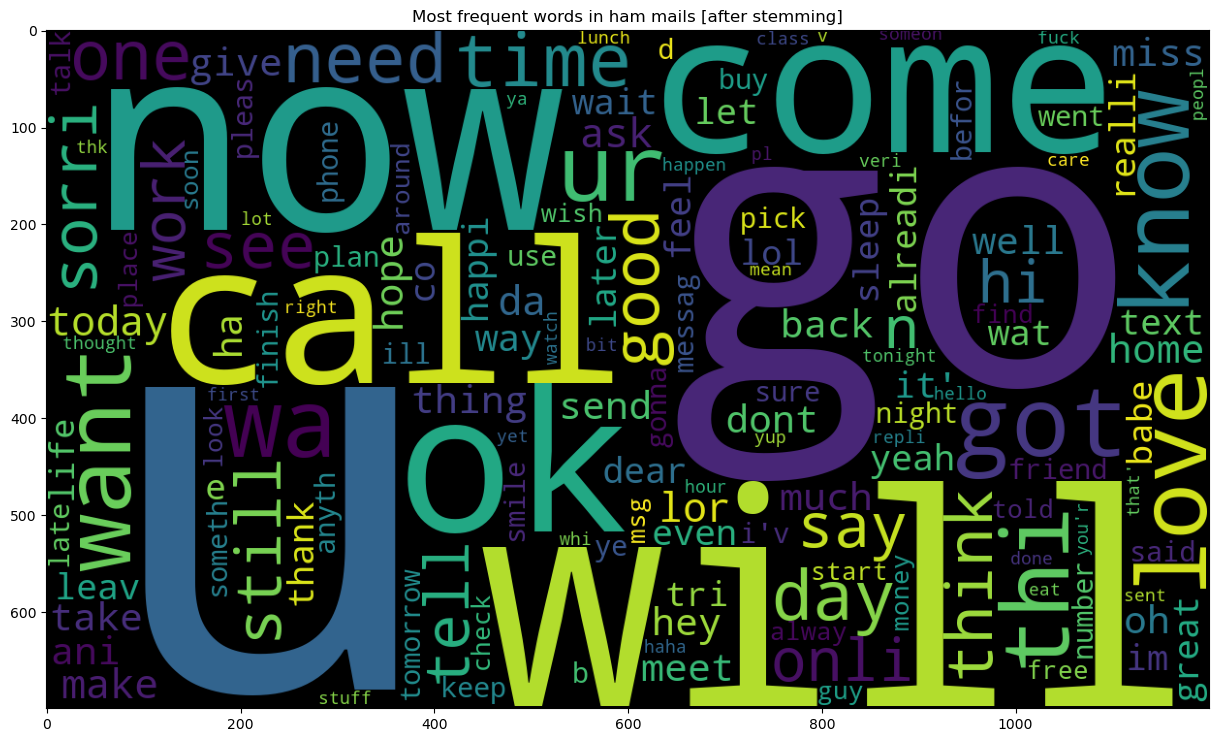

In [22]:
plt.figure(figsize=(15,10))
plt.imshow(stem_ham1)
plt.title('Most frequent words in ham mails [after stemming]')
plt.show()

In [23]:
# Converting Categorical Into Numerical :
from sklearn.preprocessing import LabelEncoder
lab1=LabelEncoder()
df['category']=lab1.fit_transform(df['category'])
df

,category,mails
0,0,Go until jurong point crazy Available only in ...
1,0,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor U c already then say
4,0,Nah I don't think he goes to usf he lives arou...
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will b going to esplanade fr home
5569,0,Pity was in mood for that Soany other suggestions
5570,0,The guy did some bitching but I acted like i'd...


In [24]:
# Text Vectorization :
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
df3=df.copy()
tfid=TfidfVectorizer(max_features=1500)
count=CountVectorizer(ngram_range=(1,3))
tfid.fit(df['mails'])
count.fit(df3['mails'])
feat=tfid.transform(df['mails'])
Y=df['category']
feat1=count.transform(df3['mails'])
Y1=df3['category']

In [25]:
# Train Test Split :
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(feat, Y, train_size=0.85, random_state=1)
x_train1,x_test1,y_train1,y_test1=train_test_split(feat1, Y1, train_size=0.85, random_state=1)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4736, 1500), (836, 1500), (4736,), (836,))

In [26]:
# Best Data For Model :
def checking(x_train,y_train,x_test,y_test,random_state):
  from sklearn.linear_model import LogisticRegression
  from sklearn.tree import DecisionTreeClassifier
  from sklearn.ensemble import RandomForestClassifier
  from sklearn.svm import SVC
  from sklearn.neighbors import KNeighborsClassifier
  from sklearn.naive_bayes import MultinomialNB
  c_log=LogisticRegression()
  c_dis=DecisionTreeClassifier(random_state=random_state)
  c_ran=RandomForestClassifier(n_estimators=90,random_state=random_state)
  c_svm=SVC()
  c_knn=KNeighborsClassifier()
  c_nb=MultinomialNB()
  acc2=[]
  list2=[c_log,c_dis,c_ran,c_svm,c_knn,c_nb]
  for i in list2:
    i.fit(x_train,y_train)
    acc2.append(i.score(x_test,y_test))
  return sum(acc2)/len(acc2)  

In [27]:
# N Grams :
con=checking(x_train=x_train1,y_train=y_train1,x_test=x_test1,y_test=y_test1,random_state=1)
con

0.9637161084529505

In [28]:
# Logistic Regression :
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(x_train,y_train)
y_pre=log.predict(x_test)

In [29]:
log.score(x_test,y_test)

0.9808612440191388

In [30]:
log.score(x_train,y_train)

0.9774070945945946

In [31]:
# Performing Metrics :
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,classification_report,roc_curve

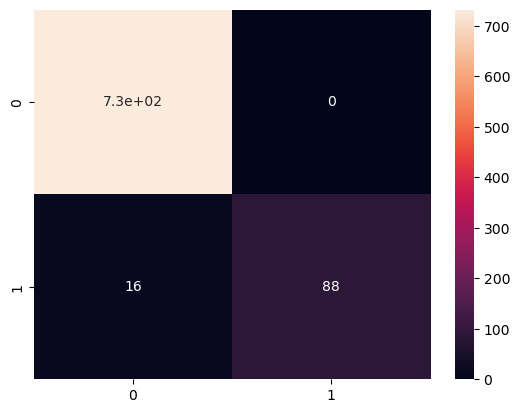

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pre),annot=True)
plt.show()

In [33]:
print(classification_report(y_test,y_pre))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       732
           1       1.00      0.85      0.92       104

    accuracy                           0.98       836
   macro avg       0.99      0.92      0.95       836
weighted avg       0.98      0.98      0.98       836



In [34]:
# Wrong Predictions :
df_log=pd.DataFrame({'Actual':y_test,'Predicted':y_pre})
w=len(df_log.loc[df_log['Actual'] != df_log['Predicted']])
w

16

In [35]:
# Decision Tree Classifier :
from sklearn.tree import DecisionTreeClassifier
dis=DecisionTreeClassifier(random_state=1)
dis.fit(x_train,y_train)
y_pre_dis=dis.predict(x_test)

In [36]:
dis.score(x_test,y_test)

0.9641148325358851

In [37]:
dis.score(x_train,y_train)

0.9995777027027027

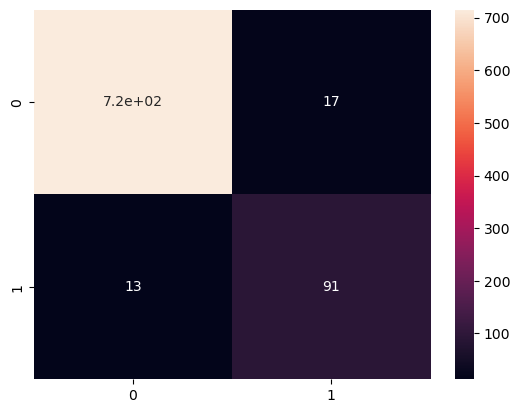

In [38]:
# Performing Metrics :
sns.heatmap(confusion_matrix(y_test,y_pre_dis),annot=True)
plt.show()

In [39]:
print(classification_report(y_test,y_pre_dis))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       732
           1       0.84      0.88      0.86       104

    accuracy                           0.96       836
   macro avg       0.91      0.93      0.92       836
weighted avg       0.96      0.96      0.96       836



In [40]:
# Wrong Predictions :
df_dis=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_dis})
w1=len(df_dis.loc[df_dis['Actual'] != df_dis['Predicted']])
w1

30

In [41]:
# Random Forest Classifier :
from sklearn.ensemble import RandomForestClassifier
list1=[45,50,55,60,65,70,75,80,85,90,95,100,110,120,200]
for r in list1:
  ran1=RandomForestClassifier(n_estimators=r,random_state=0)
  ran1.fit(x_train,y_train)
  print('when n_estimators = ',r,' accuracy is = '+str(ran1.score(x_test,y_test)))
  print()

when n_estimators =  45  accuracy is = 0.9868421052631579

when n_estimators =  50  accuracy is = 0.9856459330143541

when n_estimators =  55  accuracy is = 0.9844497607655502

when n_estimators =  60  accuracy is = 0.9868421052631579

when n_estimators =  65  accuracy is = 0.9856459330143541

when n_estimators =  70  accuracy is = 0.9856459330143541

when n_estimators =  75  accuracy is = 0.9856459330143541

when n_estimators =  80  accuracy is = 0.9868421052631579

when n_estimators =  85  accuracy is = 0.9856459330143541

when n_estimators =  90  accuracy is = 0.9856459330143541

when n_estimators =  95  accuracy is = 0.9856459330143541

when n_estimators =  100  accuracy is = 0.9856459330143541

when n_estimators =  110  accuracy is = 0.9856459330143541

when n_estimators =  120  accuracy is = 0.9868421052631579

when n_estimators =  200  accuracy is = 0.9868421052631579



In [42]:
ran=RandomForestClassifier(n_estimators=90,random_state=0)
ran.fit(x_train,y_train)
y_pre_ran=ran.predict(x_test)

In [43]:
ran.score(x_test,y_test)

0.9856459330143541

In [44]:
ran.score(x_train,y_train)

0.9995777027027027

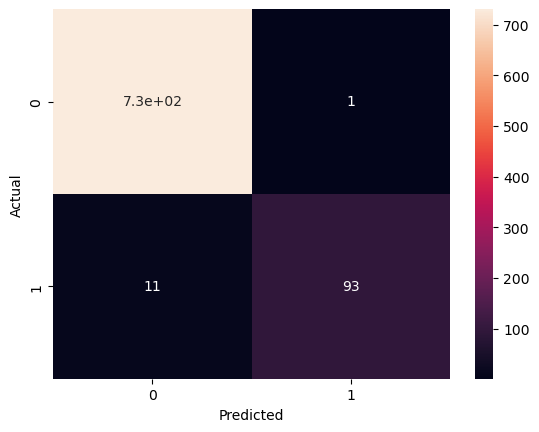

In [45]:
# Performing Metrics :
sns.heatmap(confusion_matrix(y_test,y_pre_ran),annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [46]:
print(classification_report(y_test,y_pre_ran))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       732
           1       0.99      0.89      0.94       104

    accuracy                           0.99       836
   macro avg       0.99      0.95      0.97       836
weighted avg       0.99      0.99      0.99       836



In [47]:
# Wrong Predictions :
df_ran=pd.DataFrame({'Actual':y_test,'Predicted':y_pre_ran})
w2=len(df_ran.loc[df_ran['Actual'] != df_ran['Predicted']])
w2

12

Thank you